#  EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

In [4]:
airbnb = pd.read_csv('./listings_montreal_transformed.csv', index_col=0)
airbnb.head()

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_bedrooms,number_beds,number_bath,shared_bathrooms
0,753212,Le Plateau-Mont-Royal,Private room,21.0,31,13,0.34,3,286,0,1.0,1.0,1.0,True
1,202884942,Rosemont-La Petite-Patrie,Entire home/apt,40.0,90,0,0.00,1,0,0,1.0,1.0,1.0,False
2,65607998,Verdun,Entire home/apt,55.0,31,0,0.00,1,27,0,1.0,1.0,1.0,False
3,368730072,Ville-Marie,Entire home/apt,160.0,31,0,0.00,1,364,0,2.0,2.0,1.0,False
4,162017221,Ville-Marie,Entire home/apt,60.0,31,4,0.39,2,0,4,1.0,1.0,1.0,False


In [5]:

def histogram_boxplot(feature, figsize=(8,6), bins=None, log_scale=False, showfliers=True):
    """ Boxplot and histogram combined """
    if log_scale:
        feature = np.log1p(feature)  # Apply log transformation

    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', showfliers=showfliers)
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins, color='orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2, color='tab:cyan')
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')


def perc_on_bar(feature, rotation=90,figsize=(15, 5)):
    """ Barplot with percentage, with an option to rotate x-axis labels """
    total = len(airbnb[feature])  # length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=feature, data=airbnb, palette='Paired')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)  # Rotate x-axis labels
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percentage
    plt.show()  # show the plot



Histograms and Boxplots for numerical variables: num_bedrooms, number_beds, number_bath, price

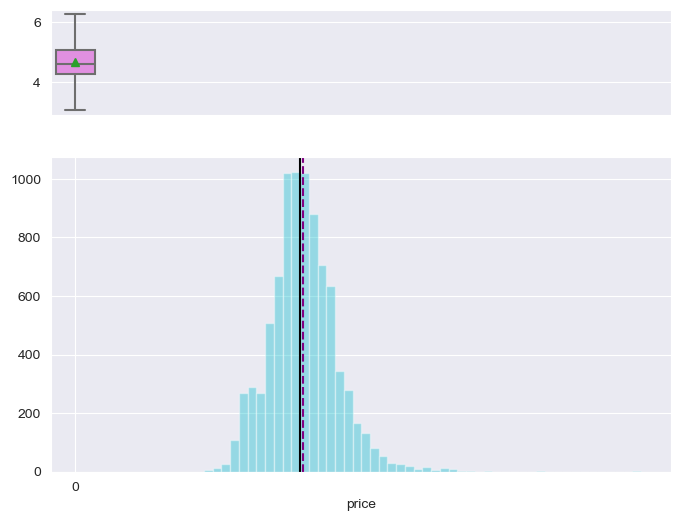

In [6]:
histogram_boxplot(airbnb['price'], log_scale=True, showfliers=False)

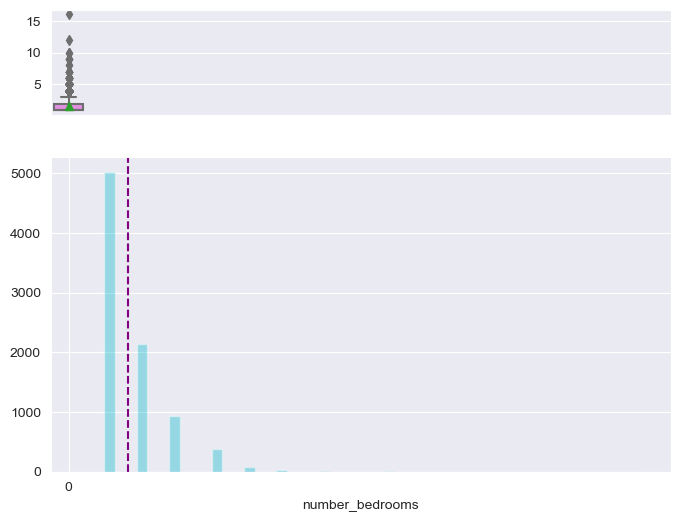

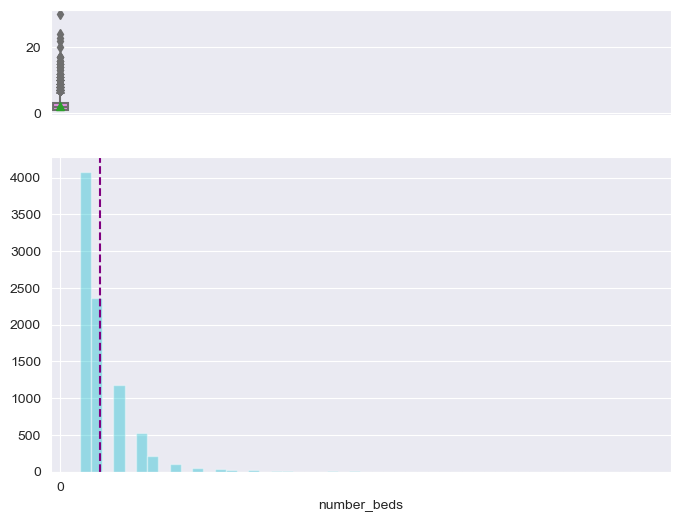

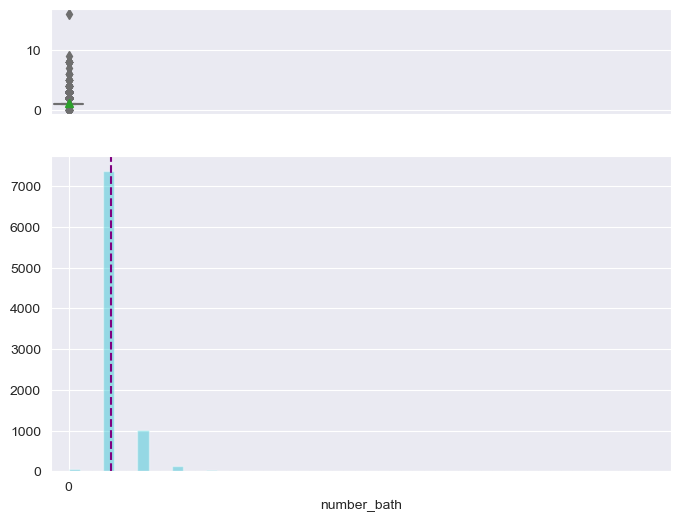

In [7]:

for col in ['number_bedrooms', 'number_beds', 'number_bath']:
    histogram_boxplot(airbnb[col])


Bar plots for categorical variables: room_type, neighbourhood, shared_bathrooms

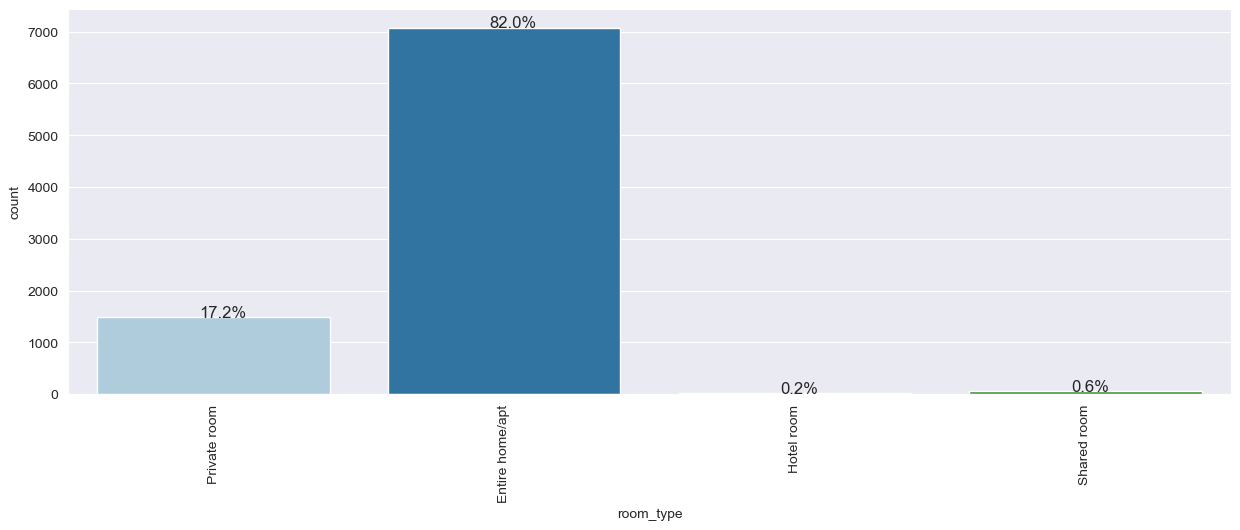

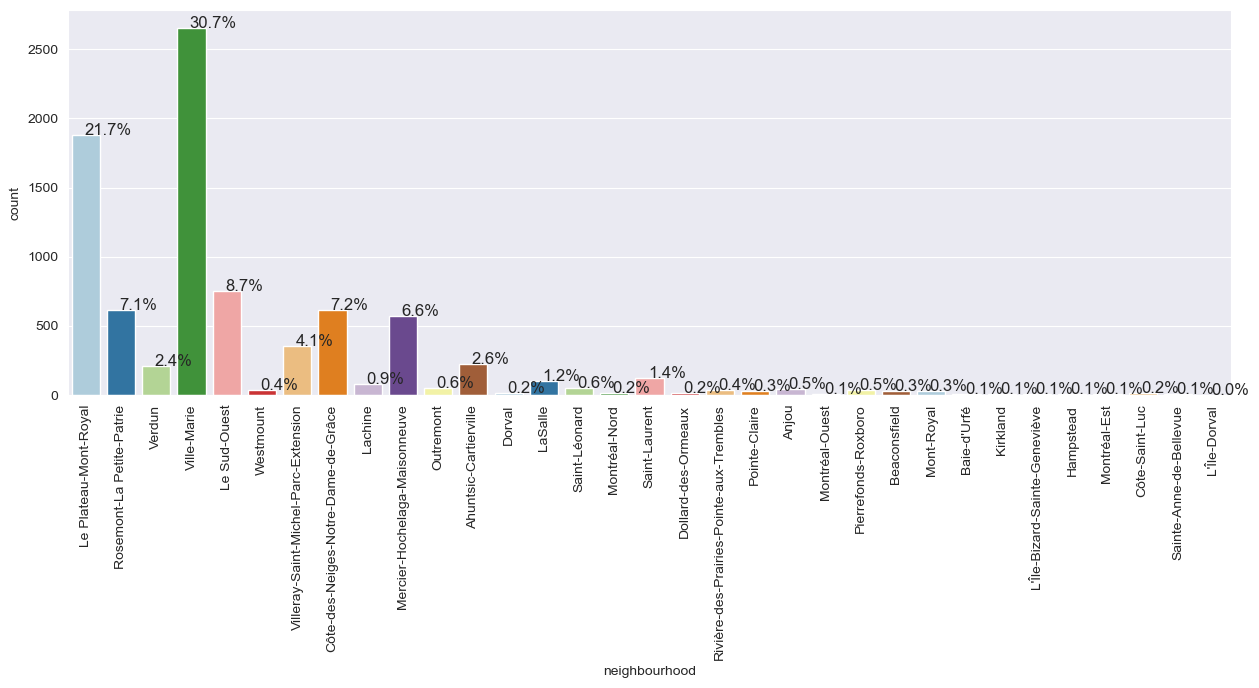

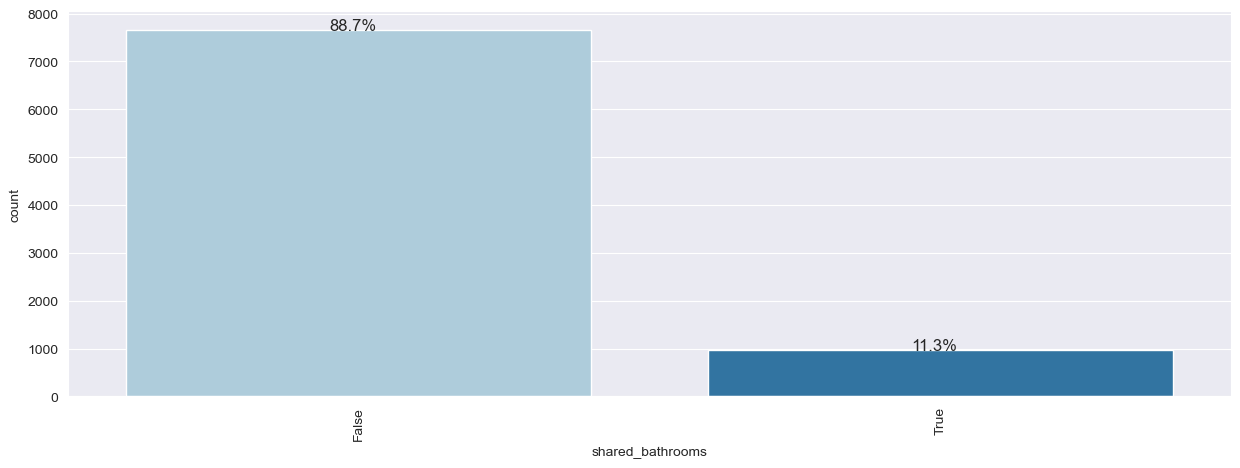

In [8]:
for col in ['room_type', 'neighbourhood', 'shared_bathrooms']:
    perc_on_bar(col)

Correlation Check

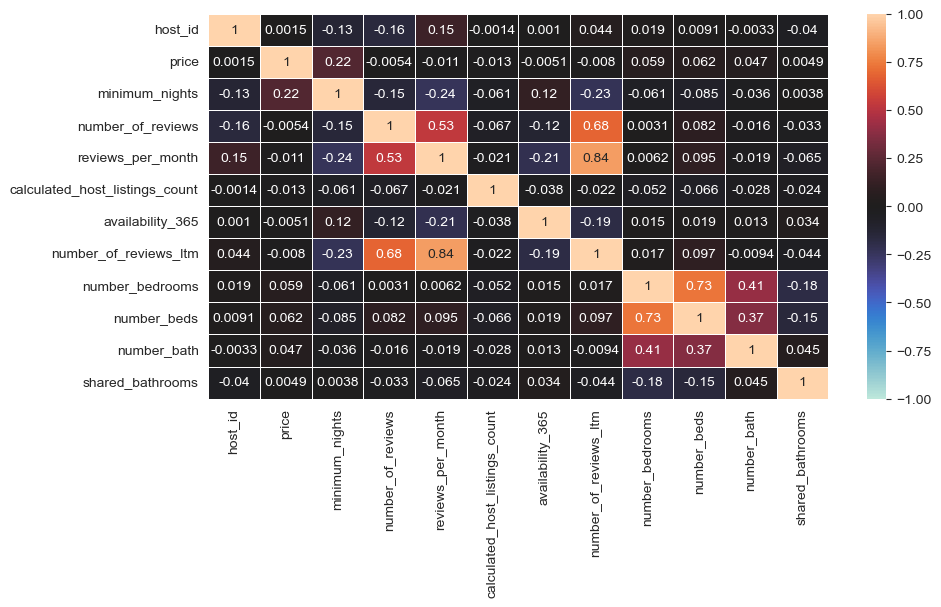

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(airbnb.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0, cbar=True)
plt.show()

Analysis of 'price' correlation

In [10]:
correlation_price = airbnb.corr()['price'].sort_values(ascending=False)
print(correlation_price)

price                             1.000000
minimum_nights                    0.220188
number_beds                       0.062125
number_bedrooms                   0.058698
number_bath                       0.046722
shared_bathrooms                  0.004893
host_id                           0.001547
availability_365                 -0.005093
number_of_reviews                -0.005430
number_of_reviews_ltm            -0.008037
reviews_per_month                -0.011100
calculated_host_listings_count   -0.013294
Name: price, dtype: float64


 Pair plots

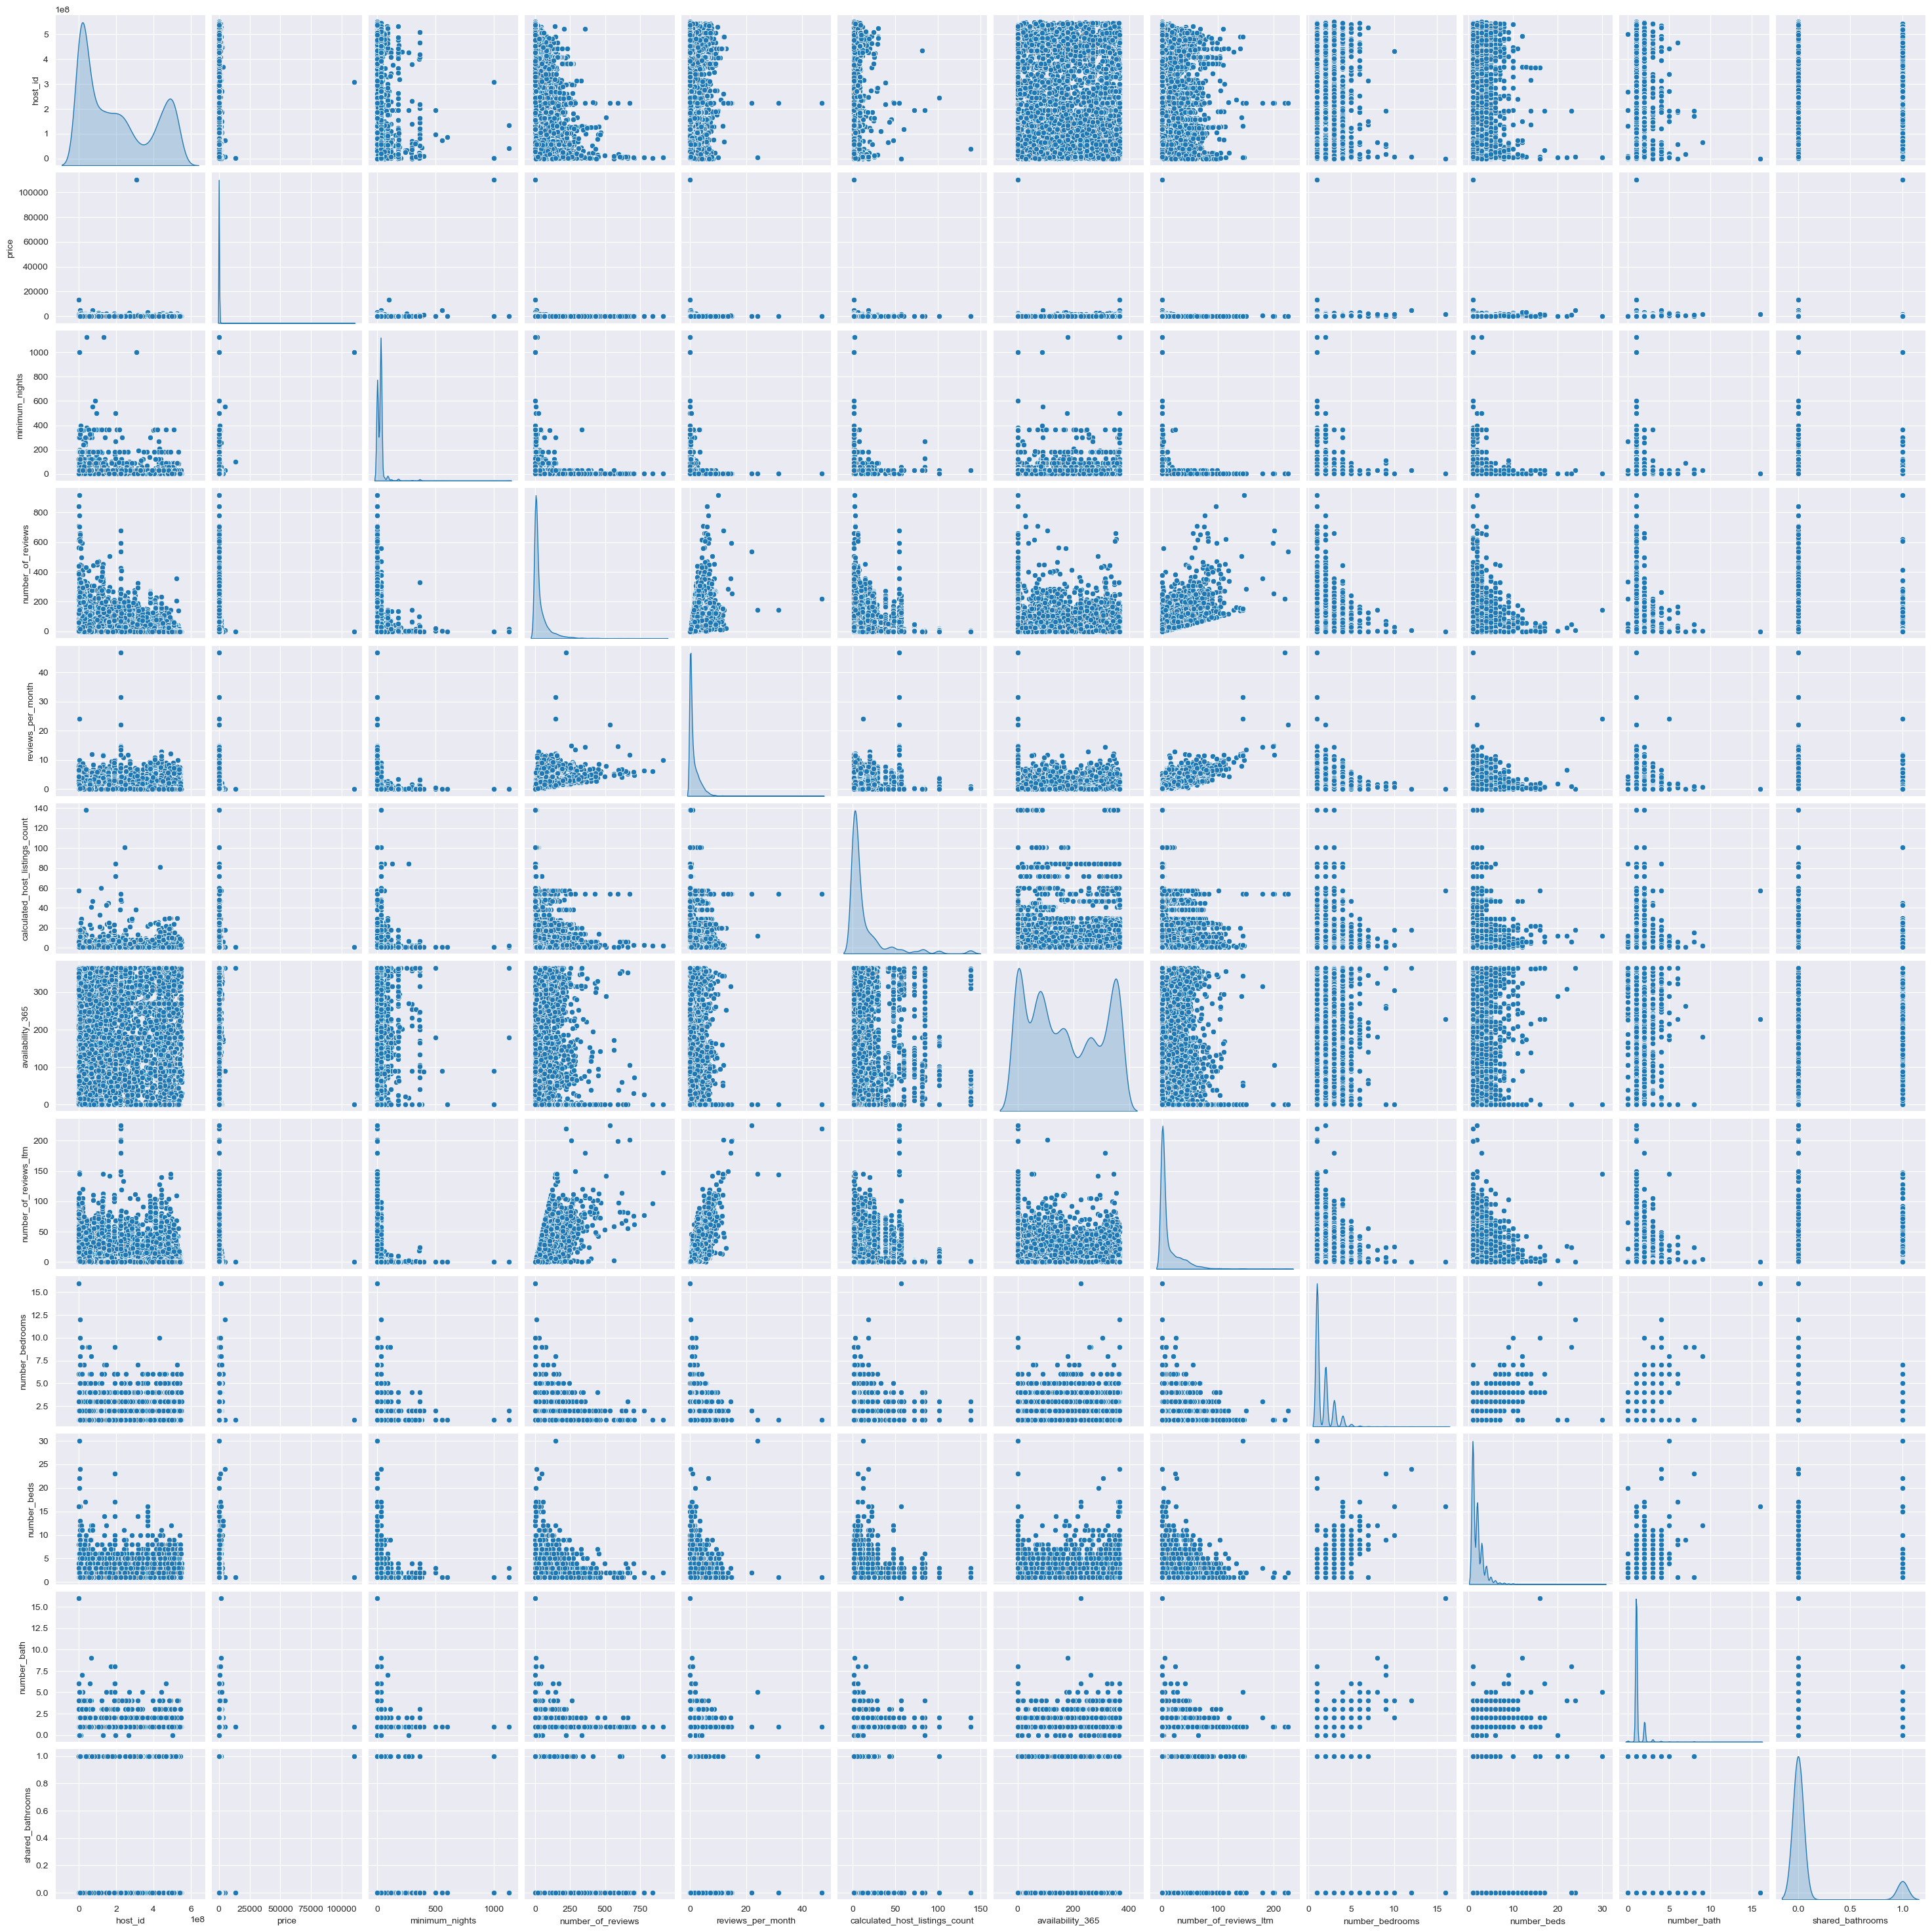

In [11]:
sns.pairplot(airbnb, diag_kind='kde')
plt.show()


Attribute combinations (number_beds per num_bedrooms)

In [12]:
airbnb['beds_per_bedrooms'] = airbnb['number_beds'] / airbnb['number_bedrooms']
airbnb[['beds_per_bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
beds_per_bedrooms,8600.0,1.254496,0.713838,0.142857,1.0,1.0,1.333333,30.0


Display the correlation heatmap again with the new feature

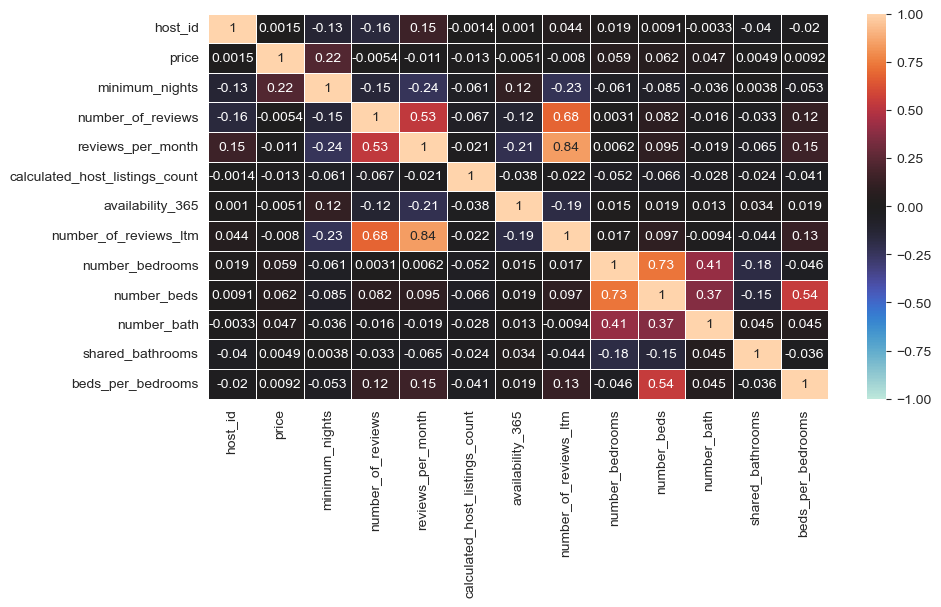

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(airbnb.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0, cbar=True)
plt.show()

Check the updated correlation with price

In [14]:
updated_correlation_price = airbnb.corr()['price'].sort_values(ascending=False)
print(updated_correlation_price)

price                             1.000000
minimum_nights                    0.220188
number_beds                       0.062125
number_bedrooms                   0.058698
number_bath                       0.046722
beds_per_bedrooms                 0.009150
shared_bathrooms                  0.004893
host_id                           0.001547
availability_365                 -0.005093
number_of_reviews                -0.005430
number_of_reviews_ltm            -0.008037
reviews_per_month                -0.011100
calculated_host_listings_count   -0.013294
Name: price, dtype: float64
